# What's New in Aethos 2.0
> Summary of new features in Aethos 2.0

- toc: true 
- badges: true
- comments: true
- categories: [jupyter, aethos, datascience]
- image: https://cdn-images-1.medium.com/max/800/1*oHwKZhd8GbSnitbc-Pj-1Q.jpeg

In late 2019 I released Aethos 1.0, the first iteration of a package to automate common data science techniques. Since then I’ve received great feedback on how to improve Aethos which I’ll introduce here! It will be a lot of code examples to show the power and versatility of the package.

You can view the previous posts about Aethos on my blog!

> [Intro to Aethos](https://towardsdatascience.com/training-tracking-analyzing-interpreting-and-serving-models-with-one-line-of-code-785ea3b0668b)

> [Modelling with Aethos](https://towardsdatascience.com/training-tracking-analyzing-interpreting-and-serving-models-with-one-line-of-code-785ea3b0668b)

## What is Aethos?

For those new to Aethos, Aethos is a Python library of automated data science techniques and use cases from missing value imputation, NLP pre-processing, feature engineering, data visualization to modelling, model analysis and model deployment.

To see the full capabilities and the rest of the techniques and models you can run, checkout the project page on [Github](https://github.com/Ashton-Sidhu/aethos)!

## Problems with Aethos 1.0

Alot of the problems with the first version of Aethos were related to the usability of the package and its API. The major problems were:

- Slow import times due to the number of files and coupled packages.

- Having 2 objects for end to end analysis - Data for transformations and Model for modelling

- Model object had every model and was not specific to Supervised or Unsupervised problems.

- Unintuitive API calls for adding new columns to the underlying DataFrames

- Reporting feature was, well, garbage and becoming redundant with external tools like converting notebooks to pdfs.

- API had limited use cases. You couldn't just analyze your data, or just analyze a model you trained without Aethos.

- Aethos and Pandas were not interchangeable and did not work together when transforming data.

## What's new in Aethos 2.0

Aethos 2.0 looks to address the intuitiveness and usability of the package to make it easier to use and understand. It also addresses the ability to work with Pandas Dataframes side by side with Aethos.

- Reduced import time of the package by simplifying and decoupling of the Aethos modules.

- Only 1 object to analyze, visualize, transform, model and analyze results.

- Can now specify the type of problem - Classification, Regression or Unsupervised and only see the models specific to those problems.

- Removed the complexity of adding data to the underlying dataframes through Aethos objects. You can access the underlying dataframes with the `x_train` and `x_test` properties.

- Removed reporting feature.

- Introduced new objects to support new cases:

  - *Analysis*: To analyze, visualize and run statistical analysis (t-test, anova, etc.) on your data.
  
  - *Classification*: To analyze, visualize, run statistical analysis, transform and impute your data to run classification models. 
  
  - *Regression*: To analyze, visualize, run statistical analysis, transform and impute your data to run regression models.
  
  - *Unsupervised*: To analyze, visualize, run statistical analysis, transform and impute your data to run unsupervised models.
  
  - *ClassificationModelAnalysis*: Interpret, analyze and visualize classification model results.
  
  - *RegressionModelAnalysis*: Interpret, analyze and visualize regression model results.
  
  - *UnsupervisedModelAnalysis*: Interpret, analyze and visualize unsupervised model results.
  
  - *TextModelAnalysis*: Interpret, analyze and visualize text model results.
  
- Removed dot notation when accessing DataFrame columns.

- Can now chain methods together.

> Note: The model analysis objects get automatically initialized when you run a model with Aethos. They can also be initialized by themselves by supplying a model object, train data and test data.

## Examples

In [ ]:
!pip install aethos

In [48]:
import pandas as pd
import aethos as at

at.options.track_experiments = True # Enable experiment tracking with MLFlow

To showcase each of the objects let's load in the titanic dataset.

In [55]:
orig_data = pd.read_csv('https://raw.githubusercontent.com/Ashton-Sidhu/aethos/develop/examples/data/train.csv')

In [50]:
orig_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count  891.000000   891.000000  891.000000  714.000000  891.000000   
mean   446.000000   0.383838    2.308642    29.699118   0.523008     
std    257.353842   0.486592    0.836071    14.526497   1.102743     
min    1.000000     0.000000    1.000000    0.420000    0.000000     
25%    223.500000   0.000000    2.000000    20.125000   0.000000     
50%    446.000000   0.000000    3.000000    28.000000   0.000000     
75%    668.500000   1.000000    3.000000    38.000000   1.000000     
max    891.000000   1.000000    3.000000    80.000000   8.000000     

            Parch        Fare  
count  891.000000  891.000000  
mean   0.381594    32.204208   
std    0.806057    49.693429   
min    0.000000    0.000000    
25%    0.000000    7.910400    
50%    0.000000    14.454200   
75%    0.000000    31.000000   
max    6.000000    512.329200

### Analysis

The analysis objects is mainly for quick, easy analysis and visualization of data. It doesn't have the ability to run automated cleaning and transformation techniques of Aethos, just visualizations and statistical tests. It also does not split your data, but you do have the option to provide a test set.

In [51]:
df = at.Analysis(orig_data, target='Survived')

In [52]:
df.describe()

PassengerId  Survived    Pclass    Name   Sex      Age     SibSp  \
count         891         891       891       NaN     NaN   714      891        
mean          446         0.383838  2.30864   NaN     NaN   29.6991  0.523008   
std           257.354     0.486592  0.836071  NaN     NaN   14.5265  1.10274    
min           1           0         1         NaN     NaN   0.42     0          
25%           223.5       0         2         NaN     NaN   20.125   0          
50%           446         0         3         NaN     NaN   28       0          
75%           668.5       1         3         NaN     NaN   38       1          
max           891         1         3         NaN     NaN   80       8          
counts        891         891       891       891     891   714      891        
uniques       891         2         3         891     2     88       7          
missing       0           0         0         0       0     177      0          
missing_perc  0%          0%        0%        0%      0%    19.87%   0%         
types         numeric     bool      numeric   unique  bool  numeric  numeric    

                 Parch       Ticket     Fare        Cabin     Embarked  
count         891       NaN          891      NaN          NaN          
mean          0.381594  NaN          32.2042  NaN          NaN          
std           0.806057  NaN          49.6934  NaN          NaN          
min           0         NaN          0        NaN          NaN          
25%           0         NaN          7.9104   NaN          NaN          
50%           0         NaN          14.4542  NaN          NaN          
75%           0         NaN          31       NaN          NaN          
max           6         NaN          512.329  NaN          NaN          
counts        891       891          891      204          889          
uniques       7         681          248      147          3            
missing       0         0            0        687          2            
missing_perc  0%        0%           0%       77.10%       0.22%        
types         numeric   categorical  numeric  categorical  categorical

In [53]:
df.missing_values

In [7]:
df.column_info()

PassengerId Survived   Pclass  ...     Fare        Cabin     Embarked
counts               891      891      891  ...      891          204          889
uniques              891        2        3  ...      248          147            3
missing                0        0        0  ...        0          687            2
missing_perc          0%       0%       0%  ...       0%       77.10%        0.22%
types            numeric     bool  numeric  ...  numeric  categorical  categorical

[5 rows x 12 columns]

In [8]:
df.standardize_column_names()

passengerid  survived  pclass                                                                                name     sex    age  sibsp  parch              ticket      fare            cabin embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000             C123        S
4              5         0       3                                                            Allen, Mr. William Henry    male  35.00      0      0              373450    8.0500              NaN        S
5              6         0       3                                                                    Moran, Mr. James    male    NaN      0      0              330877    8.4583              NaN        Q
6              7         0       1                                                             McCarthy, Mr. Timothy J    male  54.00      0      0               17463   51.8625              E46        S
7              8         0       3                                                      Palsson, Master. Gosta Leonard    male   2.00      3      1              349909   21.0750              NaN        S
8              9         1       3                                   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.00      0      2              347742   11.1333              NaN        S
9             10         1       2                                                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.00      1      0              237736   30.0708              NaN        C
10            11         1       3                                                     Sandstrom, Miss. Marguerite Rut  female   4.00      1      1             PP 9549   16.7000               G6        S
11            12         1       1                                                            Bonnell, Miss. Elizabeth  female  58.00      0      0              113783   26.5500             C103        S
12            13         0       3                                                      Saundercock, Mr. William Henry    male  20.00      0      0           A/5. 2151    8.0500              NaN        S
13            14         0       3                                                         Andersson, Mr. Anders Johan    male  39.00      1      5              347082   31.2750              NaN        S
14            15         0       3                                                Vestrom, Miss. Hulda Amanda Adolfina  female  14.00      0      0              350406    7.8542              NaN        S
15            16         1       2                                                    Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0      0              248706   16.0000              NaN        S
16            17         0       3                                                                Rice, Master. Eugene    male   2.00      4      1              382652   29.1250              NaN        Q
17            18         1       2                                                        Williams, Mr. Charles Eugene    male    NaN      0      0              244373   13.0000              NaN        S
18            19         0       3                             Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  female  3

mean                        32.2042
std                         49.6934
variance                    2469.44
min                               0
max                         512.329
mode                           8.05
5%                            7.225
25%                          7.9104
50%                         14.4542
75%                              31
95%                         112.079
iqr                         23.0896
kurtosis                    33.3981
skewness                    4.78732
sum                         28693.9
mad                         28.1637
cv                          1.54307
zeros_num                        15
zeros_perc                    1.68%
deviating_of_mean                20
deviating_of_mean_perc        2.24%
deviating_of_median              53
deviating_of_median_perc      5.95%
top_correlations                   
counts                          891
uniques                         248
missing                           0
missing_perc                

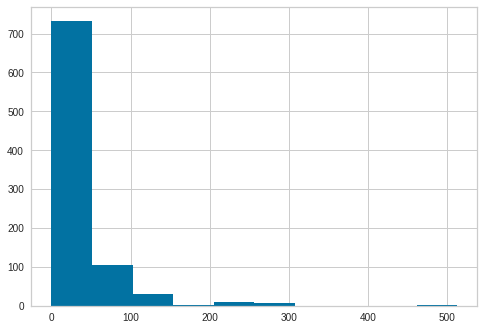

In [9]:
df.describe_column('fare')

In [54]:
df.data_report()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Easily view the histogram of multiple features.

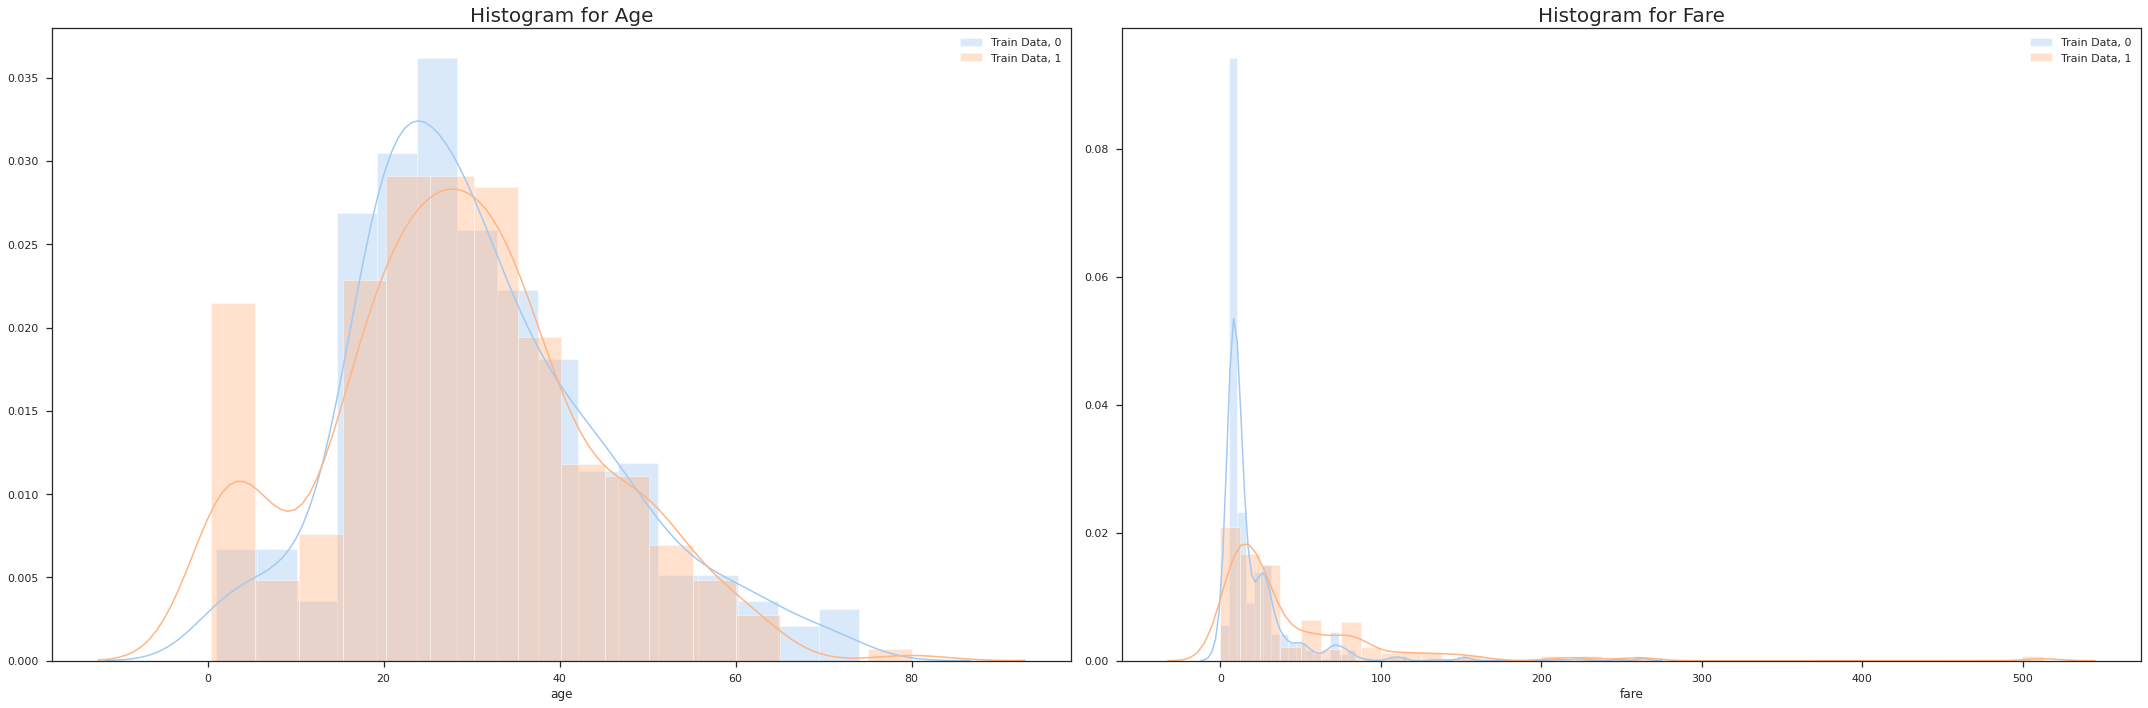

In [11]:
df.histogram('age', 'fare', hue='survived')

Create a configurable correlation matrix.

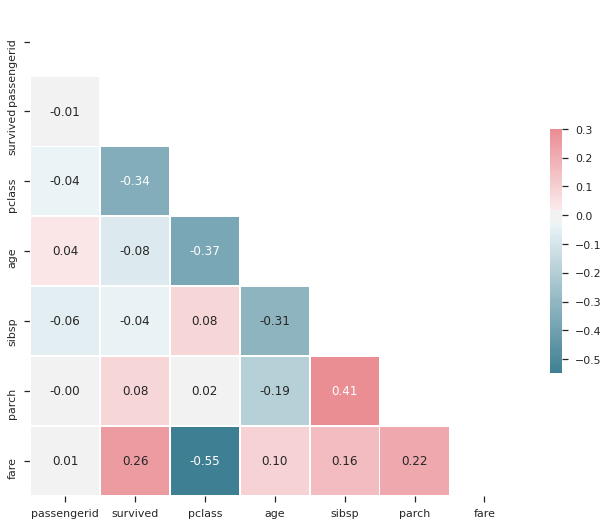

In [12]:
df.correlation_matrix(data_labels=True, hide_mirror=True)

We can easily plot the average price each age paid for a ticket.

In [13]:
df.barplot(x='age', y='fare', method='mean', labels={'age': 'Age', 'fare': 'Fare'}, asc=False)

We can also easily view the relationship between age and fair and see the difference between those who survived and who didn't.

In [14]:
df.scatterplot(x='age', y='fare', color='survived', labels={'age': 'Age', 'fare': 'Fare'}, marginal_x='histogram', marginal_y='histogram')

You can visualize other plots like raincloud, violin, box, pairwise, etc. I recommend checking out the examples for more!

One of the big changes is that ability to work with pandas side by side. If you want to transform and work with data solely with Pandas, the Analysis object will reflect those changes. This allows you to use Aethos solely for automated analysis and Pandas for transformations.

To demonstrate this we will make a new boolean feature to see if a passenger was a child using the original pandas dataframe we created

In [15]:
orig_data['is_child'] = (orig_data['age'] < 18).astype(int)
orig_data.head()

passengerid  survived  pclass  ... cabin embarked  is_child
0            1         0       3  ...   NaN        S         0
1            2         1       1  ...   C85        C         0
2            3         1       3  ...   NaN        S         0
3            4         1       1  ...  C123        S         0
4            5         0       3  ...   NaN        S         0

[5 rows x 13 columns]

Now let's see it in our Analysis object.

In [16]:
df.head()

passengerid  survived  pclass  ... cabin embarked  is_child
0            1         0       3  ...   NaN        S         0
1            2         1       1  ...   C85        C         0
2            3         1       3  ...   NaN        S         0
3            4         1       1  ...  C123        S         0
4            5         0       3  ...   NaN        S         0

[5 rows x 13 columns]

In [17]:
df.boxplot(x='is_child', y='fare', color='survived')

You can still run pandas functions on Aethos objects.

In [18]:
df.nunique()

passengerid    891
survived         2
pclass           3
name           891
sex              2
age             88
sibsp            7
parch            7
ticket         681
fare           248
cabin          147
embarked         3
is_child         2
dtype: int64

In [19]:
df['age'].nunique()

88

### New Features

Introduced in Aethos 2.0 are some new analytic techniques.

#### Predictive Power Score

The predictive power score is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix). Credits go to 8080Labs for creating this library and you can get more info [here](https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598) 

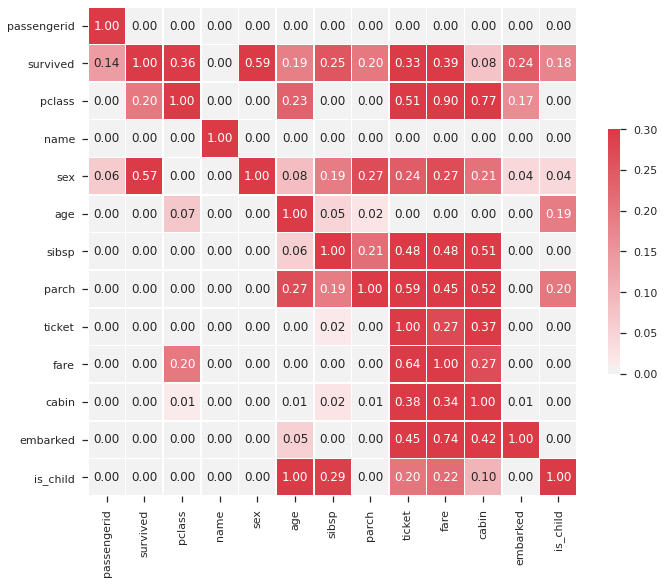

In [20]:
df.predictive_power(data_labels=True)

#### AutoViz

AutoViz auto visualizes your data and displays key plots based off the characteristics of your data. Credits go to AutoViML for creating this library and you can get more info [here](https://github.com/AutoViML/AutoViz).

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'
Shape of your Data Set: (891, 13)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Total Number of Scatter Plots = 3
Nothing to add Plot not being added
All plots done
Time to run AutoViz (in seconds) = 2.659


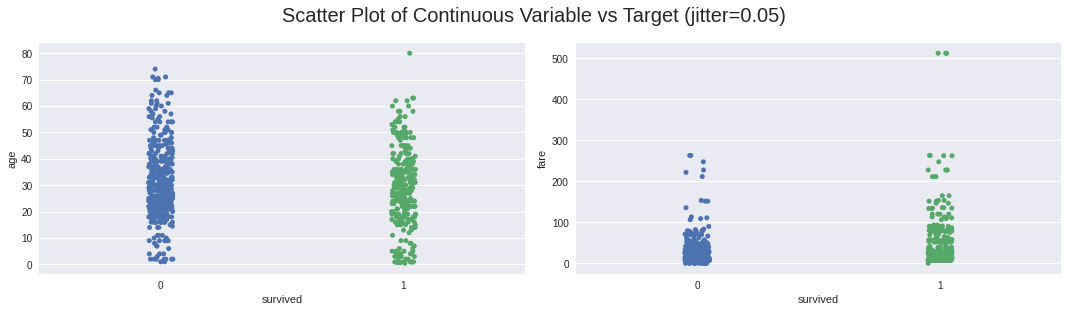

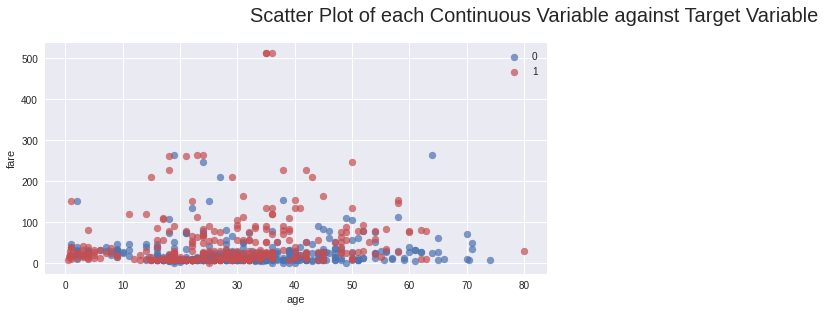

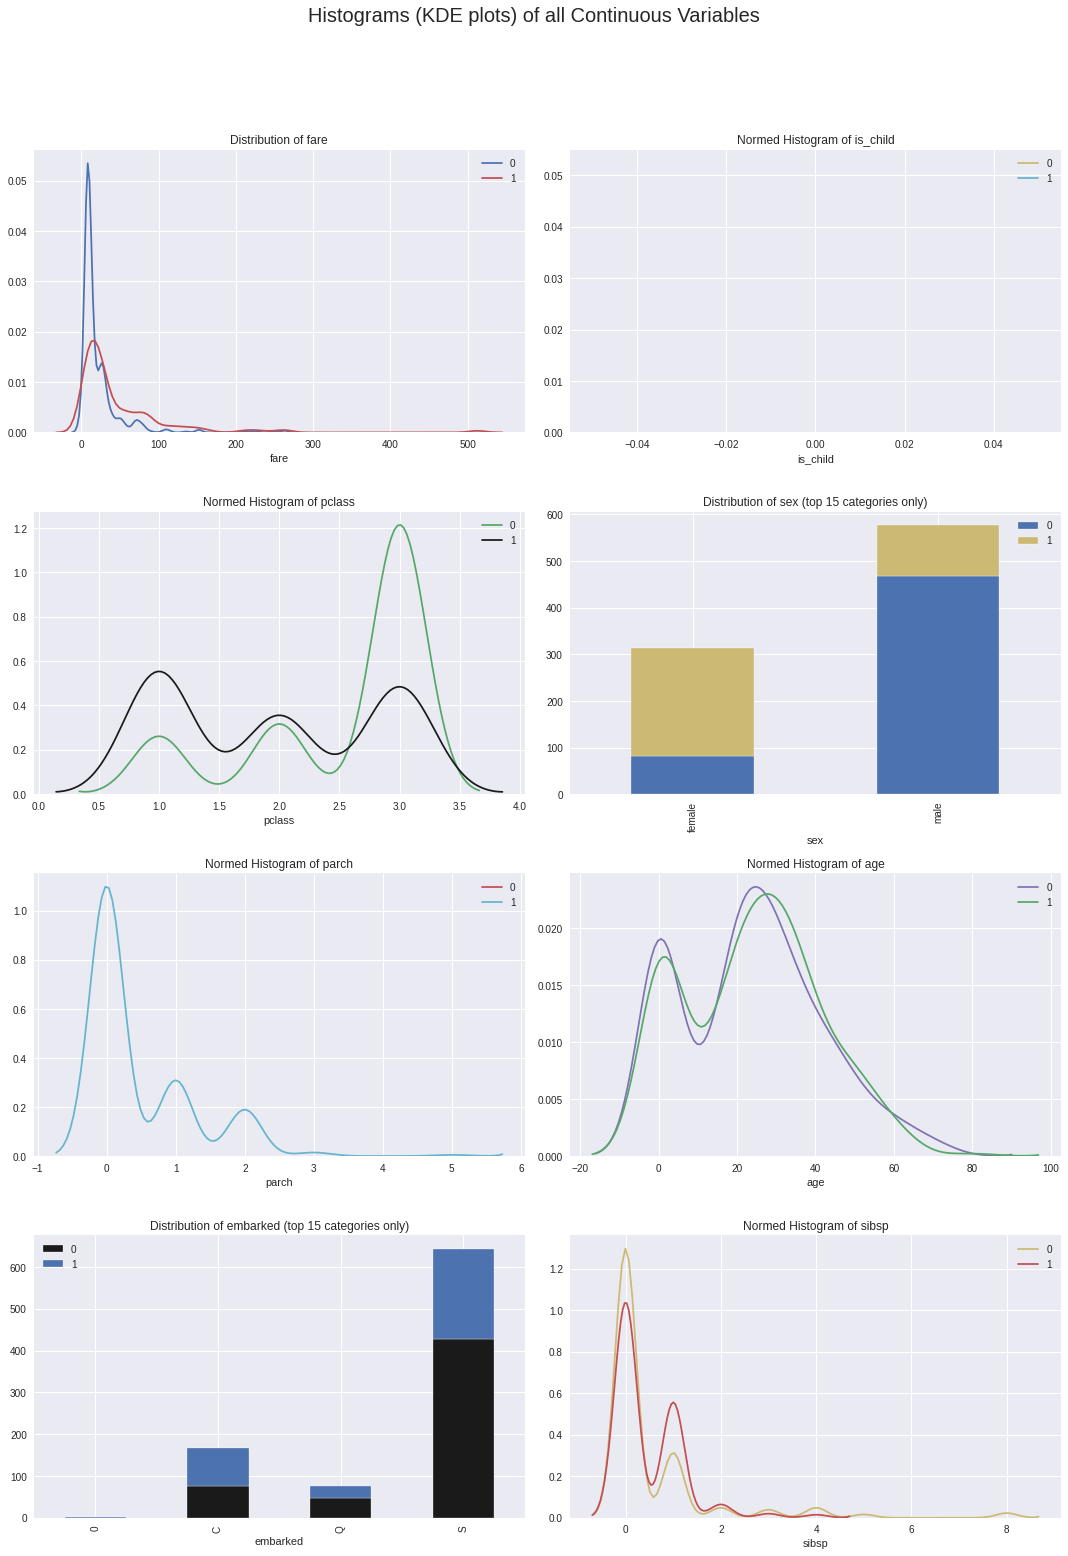

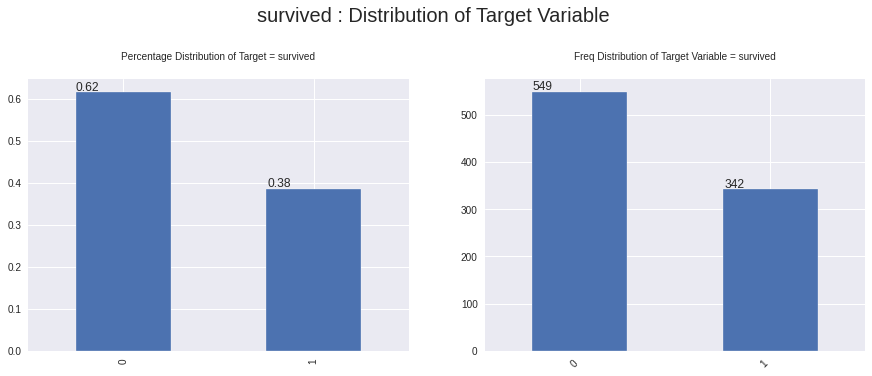

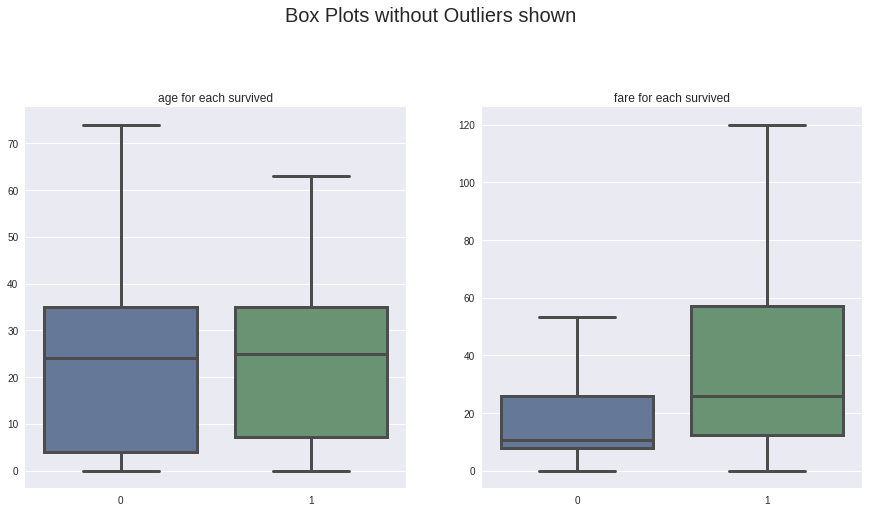

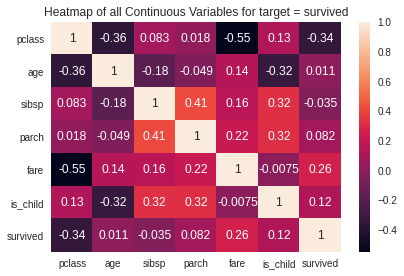

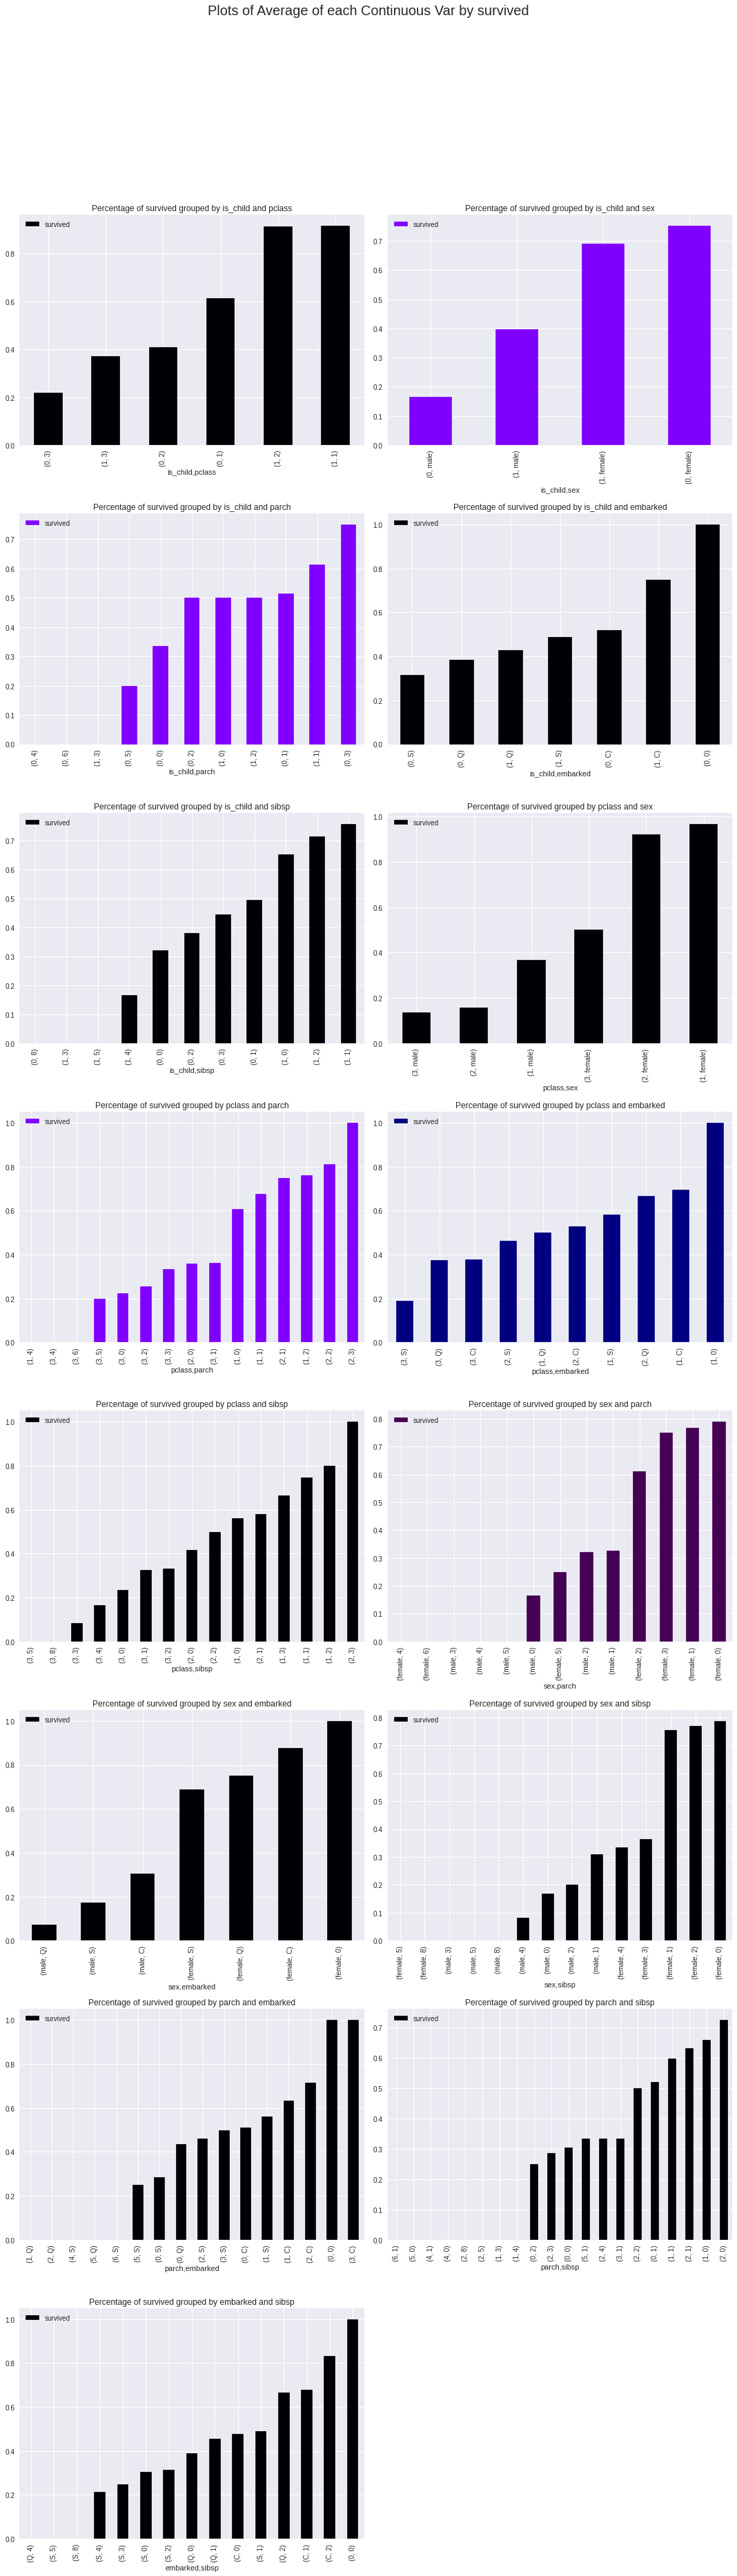

In [21]:
df.autoviz()

## Modelling

Aethos 2.0 introduces 3 new model objects: Classification, Regression and Unsupervised. These objects have the same capabilities of the Analysis object, but also can transform your data the same way it did in Aethos 1.0. For those new to Aethos, whenever you use Aethos to apply a transformation, it fits it to the training data and applies it to both the training and test data (in the case of Classification and Regression) to avoid data leakage.

In this post we'll cover the Classification object but the process is the exact same if you were working with a Regression or Unsupervised problem.

In [56]:
df = at.Classification(orig_data, target='Survived', test_split_percentage=.25)

As with Aethos 1.0 if no test data is provided, it is split upon initialization. In Aethos 2.0 it uses stratification for classification problems to split the data to ensure some resemblance of class balance.

> Warning: Earlier we showed the ability to alter the original dataframe and have it reflected in the Aethos object. This is **NOT** the case if you do not provide a test set for the Classification and Regression object.

In [57]:
df.describe()

PassengerId  Survived    Pclass    Name   Sex      Age     SibSp  \
count         668         668       668       NaN     NaN   533      668        
mean          441.913     0.383234  2.29192   NaN     NaN   29.4192  0.510479   
std           260.048     0.486539  0.841285  NaN     NaN   14.7713  1.08757    
min           1           0         1         NaN     NaN   0.42     0          
25%           214.75      0         1.75      NaN     NaN   20       0          
50%           450.5       0         3         NaN     NaN   28       0          
75%           668.25      1         3         NaN     NaN   38       1          
max           891         1         3         NaN     NaN   80       8          
counts        668         668       668       668     668   533      668        
uniques       668         2         3         668     2     82       7          
missing       0           0         0         0       0     135      0          
missing_perc  0%          0%        0%        0%      0%    20.21%   0%         
types         numeric     bool      numeric   unique  bool  numeric  numeric    

                 Parch       Ticket     Fare        Cabin     Embarked  
count         668       NaN          668      NaN          NaN          
mean          0.377246  NaN          32.4659  NaN          NaN          
std           0.781087  NaN          51.5116  NaN          NaN          
min           0         NaN          0        NaN          NaN          
25%           0         NaN          7.925    NaN          NaN          
50%           0         NaN          14.4542  NaN          NaN          
75%           0         NaN          31.275   NaN          NaN          
max           5         NaN          512.329  NaN          NaN          
counts        668       668          668      160          666          
uniques       6         545          216      121          3            
missing       0         0            0        508          2            
missing_perc  0%        0%           0%       76.05%       0.30%        
types         numeric   categorical  numeric  categorical  categorical

In [58]:
df.x_train.head()

PassengerId  Survived  Pclass                              Name   Sex  \
0  482          0         2       Frost, Mr. Anthony Wood "Archie"  male   
1  828          1         2       Mallet, Master. Andre             male   
2  562          0         3       Sivic, Mr. Husein                 male   
3  865          0         2       Gill, Mr. John William            male   
4  283          0         3       de Pelsmaeker, Mr. Alfons         male   

    Age  SibSp  Parch           Ticket     Fare Cabin Embarked  
0 NaN    0      0      239854           0.0000   NaN   S        
1  1.0   0      2      S.C./PARIS 2079  37.0042  NaN   C        
2  40.0  0      0      349251           7.8958   NaN   S        
3  24.0  0      0      233866           13.0000  NaN   S        
4  16.0  0      0      345778           9.5000   NaN   S

In [59]:
df.x_test.head()

PassengerId  Survived  Pclass  \
0  187          1         3        
1  321          0         3        
2  379          0         3        
3  698          1         3        
4  509          0         3        

                                              Name     Sex   Age  SibSp  \
0  O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)  female NaN    1       
1  Dennis, Mr. Samuel                               male    22.0  0       
2  Betros, Mr. Tannous                              male    20.0  0       
3  Mullens, Miss. Katherine "Katie"                 female NaN    0       
4  Olsen, Mr. Henry Margido                         male    28.0  0       

   Parch     Ticket     Fare Cabin Embarked  
0  0      370365     15.5000  NaN   Q        
1  0      A/5 21172  7.2500   NaN   S        
2  0      2648       4.0125   NaN   C        
3  0      35852      7.7333   NaN   Q        
4  0      C 4001     22.5250  NaN   S

In [60]:
df.missing_values

> Tip: Aethos comes with a checklist to help give you reminders when cleaning, analyzing and transforming your data!

In [61]:
df.checklist()

In [62]:
df.standardize_column_names()

passengerid  survived  pclass                                                               name     sex    age  sibsp  parch              ticket      fare            cabin embarked
0            482         0       2                                   Frost, Mr. Anthony Wood "Archie"    male    NaN      0      0              239854    0.0000              NaN        S
1            828         1       2                                              Mallet, Master. Andre    male   1.00      0      2     S.C./PARIS 2079   37.0042              NaN        C
2            562         0       3                                                  Sivic, Mr. Husein    male  40.00      0      0              349251    7.8958              NaN        S
3            865         0       2                                             Gill, Mr. John William    male  24.00      0      0              233866   13.0000              NaN        S
4            283         0       3                                          de Pelsmaeker, Mr. Alfons    male  16.00      0      0              345778    9.5000              NaN        S
5             24         1       1                                       Sloper, Mr. William Thompson    male  28.00      0      0              113788   35.5000               A6        S
6            706         0       2                     Morley, Mr. Henry Samuel ("Mr Henry Marshall")    male  39.00      0      0              250655   26.0000              NaN        S
7            673         0       2                                        Mitchell, Mr. Henry Michael    male  70.00      0      0          C.A. 24580   10.5000              NaN        S
8            315         0       2                                                 Hart, Mr. Benjamin    male  43.00      1      1        F.C.C. 13529   26.2500              NaN        S
9            797         1       1                                        Leader, Dr. Alice (Farnham)  female  49.00      0      0               17465   25.9292              D17        S
10           494         0       1                                            Artagaveytia, Mr. Ramon    male  71.00      0      0            PC 17609   49.5042              NaN        C
11           213         0       3                                             Perkin, Mr. John Henry    male  22.00      0      0           A/5 21174    7.2500              NaN        S
12           748         1       2                                              Sinkkonen, Miss. Anna  female  30.00      0      0              250648   13.0000              NaN        S
13           821         1       1                 Hays, Mrs. Charles Melville (Clara Jennings Gregg)  female  52.00      1      1               12749   93.5000              B69        S
14           711         1       1                   Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")  female  24.00      0      0            PC 17482   49.5042              C90        C
15           147         1       3                       Andersson, Mr. August Edvard ("Wennerstrom")    male  27.00      0      0              350043    7.7958              NaN        S
16           465         0       3                                                 Maisner, Mr. Simon    male    NaN      0      0            A/S 2816    8.0500              NaN        S
17           549         0       3                                          Goldsmith, Mr. Frank John    male  33.00      1      1              363291   20.5250              NaN        S
18           129         1       3                                                  Peter, Miss. Anna  female    NaN      1      1                2668   22.3583            F E69        C
19            19         0       3            Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  female  31.00      1      0              345763   18.0000              NaN        S
20           820         0       3                                       Skoog

Since this is an overview, let's select the columns were going to work with and drop the ones we're not going to use.

In [63]:
df.drop(keep=['survived', 'pclass', 'sex', 'age', 'fare', 'embarked'])

survived  pclass     sex    age      fare embarked
0           0       2    male    NaN    0.0000        S
1           1       2    male   1.00   37.0042        C
2           0       3    male  40.00    7.8958        S
3           0       2    male  24.00   13.0000        S
4           0       3    male  16.00    9.5000        S
5           1       1    male  28.00   35.5000        S
6           0       2    male  39.00   26.0000        S
7           0       2    male  70.00   10.5000        S
8           0       2    male  43.00   26.2500        S
9           1       1  female  49.00   25.9292        S
10          0       1    male  71.00   49.5042        C
11          0       3    male  22.00    7.2500        S
12          1       2  female  30.00   13.0000        S
13          1       1  female  52.00   93.5000        S
14          1       1  female  24.00   49.5042        C
15          1       3    male  27.00    7.7958        S
16          0       3    male    NaN    8.0500        S
17          0       3    male  33.00   20.5250        S
18          1       3  female    NaN   22.3583        C
19          0       3  female  31.00   18.0000        S
20          0       3    male  10.00   27.9000        S
21          1       1  female  23.00  263.0000        S
22          0       3    male  19.00    7.6500        S
23          0       3    male  29.00    9.4833        S
24          0       3  female   8.00   21.0750        S
25          0       3    male  22.00    9.3500        S
26          0       3    male    NaN    7.8958        S
27          0       3  female  22.00    9.8375        S
28          1       1    male   4.00   81.8583        S
29          0       2    male  30.00   10.5000        S
30          1       2    male   3.00   26.0000        S
31          1       2  female  33.00   27.7500        S
32          1       1    male  25.00   91.0792        C
33          0       3  female  30.00    8.6625        S
34          0       2    male  18.00   73.5000        S
35          1       3    male    NaN    7.7500        Q
36          0       2    male  29.00   10.5000        S
37          0       3    male    NaN    7.7500        Q
38          0       3    male    NaN   14.5000        S
39          0       3    male    NaN    6.9500        Q
40          0       3    male  24.00   24.1500        S
41          0       3  female  16.00   46.9000        S
42          0       2  female  24.00   13.0000        S
43          0       3    male  47.00    7.2500        S
44          0       3    male  34.00   14.4000        S
45          0       3    male    NaN    7.8958        S
46          1       2  female  31.00   26.2500        S
47          0       2    male  16.00   10.5000        S
48          0       2    male    NaN    0.0000        S
49          1       3  female  29.00   15.2458        C
50          1       3  female  16.00    7.7333        Q
51          1       2  female  33.00   26.0000        S
52          0       1    male  37.00   29.7000        C
53          0       3    male  38.00    7.0500        S
54          1       3  female    NaN   15.5000        Q
55          0       3    male   7.00   39.6875        S
56          0       3    male  18.00    7.7750        S
57          1       2  female  22.00   41.5792        C
58          1       3    male   0.42    8.5167        C
59          0       2    male  39.00   13.0000        S
60          0       2    male  36.00   27.7500        S
61          0       3  female    NaN    7.7500        Q
62          0       3  female  29.00   21.0750        S
63          0       2  female  44.00   26.0000        S
64          1       1  female  21.00   77.9583        S
65          1       3    male  16.00    8.0500        S
66          0       2    male  18.00   13.0000        S
67          1       1  female    NaN   51.8625        S
68          0       3    male    NaN   15.5000        Q
69          0       3    male  21.00    7.9250        S
70          1       3    male

Let's chain our transformations together. Remember our transformations will be fit to the training data and automatically transform our test data!

In [64]:
is_child = lambda df: 1 if df['age'] < 18 else 0

df.replace_missing_median('age') \
  .replace_missing_mostcommon('embarked') \
  .onehot_encode('sex', 'pclass', 'embarked', keep_col=False) \
  .apply(is_child, 'is_child') \
  .normalize_numeric('fare', 'age')

Pandas Apply: 100%|██████████| 223/223 [00:00<00:00, 57466.81it/s]


sex_female  sex_male  pclass_1  pclass_2  pclass_3  embarked_C  embarked_Q  embarked_S  is_child      fare       age  survived
0           0.0       1.0       0.0       1.0       0.0         0.0         0.0         1.0         0  0.000000  0.346569         0
1           0.0       1.0       0.0       1.0       0.0         1.0         0.0         0.0         1  0.072227  0.007288         1
2           0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.015412  0.497361         0
3           0.0       1.0       0.0       1.0       0.0         0.0         0.0         1.0         0  0.025374  0.296306         0
4           0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         1  0.018543  0.195778         0
5           0.0       1.0       1.0       0.0       0.0         0.0         0.0         1.0         0  0.069291  0.346569         1
6           0.0       1.0       0.0       1.0       0.0         0.0         0.0         1.0         0  0.050749  0.484795         0
7           0.0       1.0       0.0       1.0       0.0         0.0         0.0         1.0         0  0.020495  0.874340         0
8           0.0       1.0       0.0       1.0       0.0         0.0         0.0         1.0         0  0.051237  0.535059         0
9           1.0       0.0       1.0       0.0       0.0         0.0         0.0         1.0         0  0.050610  0.610455         1
10          0.0       1.0       1.0       0.0       0.0         1.0         0.0         0.0         0  0.096626  0.886906         0
11          0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.014151  0.271174         0
12          1.0       0.0       0.0       1.0       0.0         0.0         0.0         1.0         0  0.025374  0.371701         1
13          1.0       0.0       1.0       0.0       0.0         0.0         0.0         1.0         0  0.182500  0.648153         1
14          1.0       0.0       1.0       0.0       0.0         1.0         0.0         0.0         0  0.096626  0.296306         1
15          0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.015216  0.334004         1
16          0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.015713  0.346569         0
17          0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.040062  0.409399         0
18          1.0       0.0       0.0       0.0       1.0         1.0         0.0         0.0         0  0.043640  0.346569         1
19          1.0       0.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.035134  0.384267         0
20          0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         1  0.054457  0.120382         0
21          1.0       0.0       1.0       0.0       0.0         0.0         0.0         1.0         0  0.513342  0.283740         1
22          0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.014932  0.233476         0
23          0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.018510  0.359135         0
24          1.0       0.0       0.0       0.0       1.0         0.0         0.0         1.0         1  0.041136  0.095250         0
25          0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.018250  0.271174         0
26          0.0       1.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.015412  0.346569         0
27          1.0       0.0       0.0       0.0       1.0         0.0         0.0         1.0         0  0.019202  0.271174         0
28          0.0       1.0       1.0       0.0       0.0         0.0         0.0         1.0         1  0.159777  0.044986         1
29          0.0       1.0       0.0       1.0

In [65]:
df.x_train.head()

sex_female  sex_male  pclass_1  pclass_2  pclass_3  embarked_C  embarked_Q  \
0  0.0         1.0       0.0       1.0       0.0       0.0         0.0          
1  0.0         1.0       0.0       1.0       0.0       1.0         0.0          
2  0.0         1.0       0.0       0.0       1.0       0.0         0.0          
3  0.0         1.0       0.0       1.0       0.0       0.0         0.0          
4  0.0         1.0       0.0       0.0       1.0       0.0         0.0          

   embarked_S  is_child      fare       age  survived  
0  1.0         0         0.000000  0.346569  0         
1  0.0         1         0.072227  0.007288  1         
2  1.0         0         0.015412  0.497361  0         
3  1.0         0         0.025374  0.296306  0         
4  1.0         1         0.018543  0.195778  0

In [66]:
df.x_test.head()

sex_female  sex_male  pclass_1  pclass_2  pclass_3  embarked_C  embarked_Q  \
0  1.0         0.0       0.0       0.0       1.0       0.0         1.0          
1  0.0         1.0       0.0       0.0       1.0       0.0         0.0          
2  0.0         1.0       0.0       0.0       1.0       1.0         0.0          
3  1.0         0.0       0.0       0.0       1.0       0.0         1.0          
4  0.0         1.0       0.0       0.0       1.0       0.0         0.0          

   embarked_S  is_child      fare       age  survived  
0  0.0         0         0.030254  0.346569  1         
1  1.0         0         0.014151  0.271174  0         
2  0.0         0         0.007832  0.246042  0         
3  0.0         0         0.015094  0.346569  1         
4  1.0         0         0.043966  0.346569  0

Now let's train a Logistic Regression model.

We'll use gridsearch and it will automatically return the best model. We'll use Stratified K-fold for the Cross Validation technique during grid search.

In [67]:
gs_params = {
    "C": [0.1, 0.5, 1],
    "max_iter": [100, 1000]
}

lr = df.LogisticRegression(
    cv_type='strat-kfold',
    gridsearch=gs_params,
    random_state=42
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Gridsearching with the following parameters: {'C': [0.1, 0.5, 1], 'max_iter': [100, 1000]}
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Once a model is trained a ModelAnalysis object is returned which allows us to analyze, interpret and visualize our model results. Included is a list to help you debug your model if it’s overfit or underfit!

In [103]:
df.help_debug()

You can quickly cross validate any model by calling `cross_validate` on the resulting ModelAnalysis object. It will display the mean score across all folds and a learning curve.

For classification problems the default cross validation method is Stratified K-Fold. This allows to maintain some form of class balance, while for regression, the default is K-Fold.

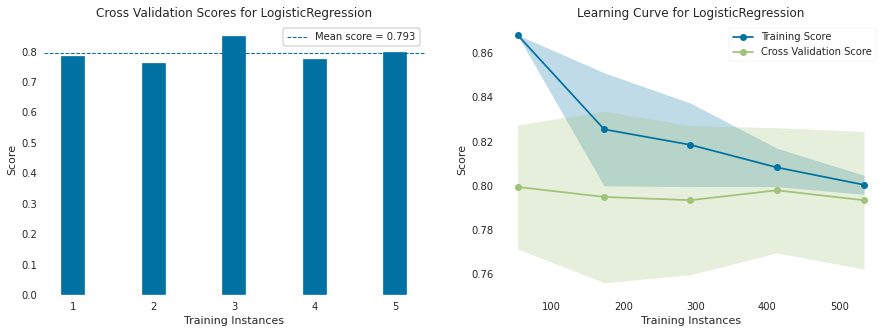

In [69]:
lr.cross_validate()

In [107]:
lr.metrics() # Note this displays the results on the test data.

log_reg  \
Accuracy                          0.780     
Balanced Accuracy                 0.774     
Average Precision                 0.822     
ROC AUC                           0.853     
Zero One Loss                     0.220     
Precision                         0.703     
Recall                            0.744     
Matthews Correlation Coefficient  0.542     
Log Loss                          0.450     
Jaccard                           0.566     
Hinge Loss                        0.511     
Hamming Loss                      0.220     
F-Beta                            0.711     
F1                                0.723     
Cohen Kappa                       0.541     
Brier Loss                        0.220     

                                                                                                                                                                                                                    Description  
Accuracy                          Measures how many observations, both positive and negative, were correctly classified.                                                                                                         
Balanced Accuracy                 The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.                        
Average Precision                 Summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold                                                                                              
ROC AUC                           Shows how good at ranking predictions your model is. It tells you what is the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.  
Zero One Loss                     Fraction of misclassifications.                                                                                                                                                                
Precision                         It measures how many observations predicted as positive are positive. Good to use when False Positives are costly.                                                                             
Recall                            It measures how many observations out of all positive observations have we classified as positive. Good to use when catching call positive occurences, usually at the cost of false positive.  
Matthews Correlation Coefficient  It’s a correlation between predicted classes and ground truth.                                                                                                                                 
Log Loss                          Difference between ground truth and predicted score for every observation and average those errors over all observations.                                                                      
Jaccard                           Defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of true labels.   
Hinge Loss                        Computes the average distance between the model and the data using hinge loss, a one-sided metric that considers only prediction errors.                                                       
Hamming Loss                      The Hamming loss is the fraction of labels that are incorrectly predicted.                                                                                                                     
F-Beta                            It’s the harmonic mean between precision and recall, with an emphasis on one or the other. Takes into account both metrics, good for imbalanced problems (spam, fraud, etc.).                  
F1                                It’s the harmonic mean between precision and recall. Takes into accoun

### Manual vs Automated

Lets's manually train a Logistic Regression and view and verify the results.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score

X_train = df.x_train.drop("survived", axis=1)
X_test = df.x_test.drop("survived", axis=1)

y_train = df.x_train["survived"]
y_test = df.x_test["survived"]

clf = LogisticRegression(C=1, max_iter=100, random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred).round(3)}")
print(f"AUC: {roc_auc_score(y_test, clf.decision_function(X_test)).round(3)}")
print(f"Precision: {precision_score(y_test, y_pred).round(3)}")

Accuracy: 0.78
AUC: 0.853
Precision: 0.703


Results are the same!

## Model Analysis

Similar to Modelling, Aethos 2.0 introduces 4 model analysis objects: ClassificationModelAnalysis, RegressionModelAnalysis, UnsupervisedModelAnalysis and TextModelAnalysis. In Aethos 2.0 they can be initialized in 2 ways:

- Result of training a model using Aethos

- Initializing it on your own by providing a Model object, the train data used by the model and the test data to evaluate model performance (for Regression and Classification).

Similar to the Model objects we're going to explore the ClassificationModelAnalysis object but the process would be the same for regression, unsupervised and text model analysis.

### Initialzed from Aethos

To start, we'll pick off from where we left off with modelling and view the metrics for our Logistic Regression model.

In [72]:
type(lr)

aethos.model_analysis.classification_model_analysis.ClassificationModelAnalysis

In [106]:
lr.metrics()

log_reg  \
Accuracy                          0.780     
Balanced Accuracy                 0.774     
Average Precision                 0.822     
ROC AUC                           0.853     
Zero One Loss                     0.220     
Precision                         0.703     
Recall                            0.744     
Matthews Correlation Coefficient  0.542     
Log Loss                          0.450     
Jaccard                           0.566     
Hinge Loss                        0.511     
Hamming Loss                      0.220     
F-Beta                            0.711     
F1                                0.723     
Cohen Kappa                       0.541     
Brier Loss                        0.220     

                                                                                                                                                                                                                    Description  
Accuracy                          Measures how many observations, both positive and negative, were correctly classified.                                                                                                         
Balanced Accuracy                 The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.                        
Average Precision                 Summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold                                                                                              
ROC AUC                           Shows how good at ranking predictions your model is. It tells you what is the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.  
Zero One Loss                     Fraction of misclassifications.                                                                                                                                                                
Precision                         It measures how many observations predicted as positive are positive. Good to use when False Positives are costly.                                                                             
Recall                            It measures how many observations out of all positive observations have we classified as positive. Good to use when catching call positive occurences, usually at the cost of false positive.  
Matthews Correlation Coefficient  It’s a correlation between predicted classes and ground truth.                                                                                                                                 
Log Loss                          Difference between ground truth and predicted score for every observation and average those errors over all observations.                                                                      
Jaccard                           Defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of true labels.   
Hinge Loss                        Computes the average distance between the model and the data using hinge loss, a one-sided metric that considers only prediction errors.                                                       
Hamming Loss                      The Hamming loss is the fraction of labels that are incorrectly predicted.                                                                                                                     
F-Beta                            It’s the harmonic mean between precision and recall, with an emphasis on one or the other. Takes into account both metrics, good for imbalanced problems (spam, fraud, etc.).                  
F1                                It’s the harmonic mean between precision and recall. Takes into accoun

You can also set project metrics based off your business requirements.

In [108]:
at.options.project_metrics = ["Accuracy", "ROC AUC", "Precision"]

In [109]:
lr.metrics()

log_reg  \
Accuracy   0.780     
ROC AUC    0.853     
Precision  0.703     

                                                                                                                                                                                             Description  
Accuracy   Measures how many observations, both positive and negative, were correctly classified.                                                                                                         
ROC AUC    Shows how good at ranking predictions your model is. It tells you what is the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.  
Precision  It measures how many observations predicted as positive are positive. Good to use when False Positives are costly.

If you want to just view individual metrics, there are functions for those to!

In [76]:
lr.fbeta(beta=0.4999)

0.7111085827756309

You can analyze any models results with just one line of code:

- Metrics
- Classification Report
- Confusion Matrix
- Decision Boundaries
- Decision Plots
- Dependence Plots
- Force Plots
- LIME Plots
- Morris Sensitivity
- Model Weights
- Summary Plot
- RoC Curve
- Individual metrics

And this is only for Classification Models, each type of problem has their own set of ModelAnalysis functions!

In [77]:
lr.classification_report()

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       137
           1       0.70      0.74      0.72        86

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



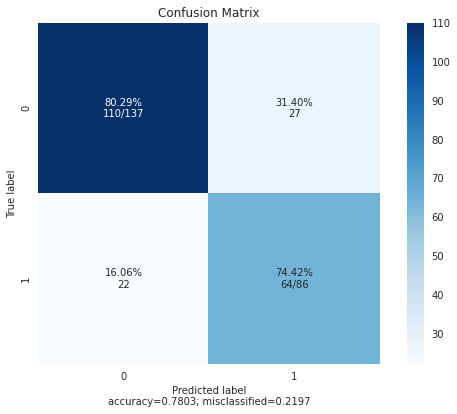

In [78]:
lr.confusion_matrix()

You can supply features from your train set to the dependency plot otherwise it will just use the first 2 features in your model. Under the hood it uses YellowBricks Decision Boundary visualizer to create the visualizations.

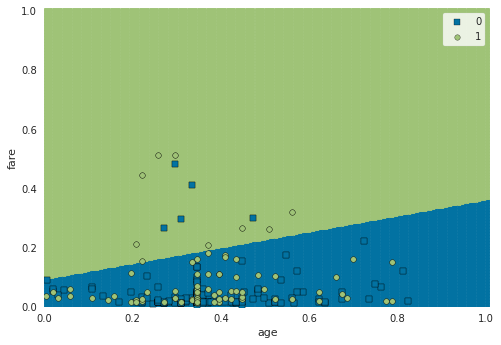

In [79]:
lr.decision_boundary('age', 'fare')

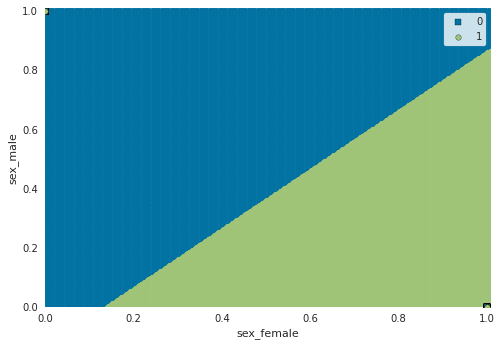

In [80]:
lr.decision_boundary()

Included are also automated SHAP use cases to interpret your model!

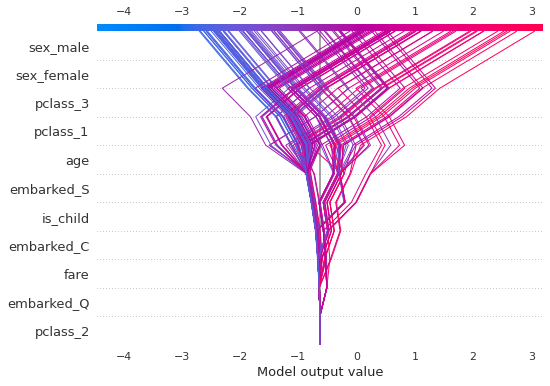

In [81]:
lr.decision_plot()

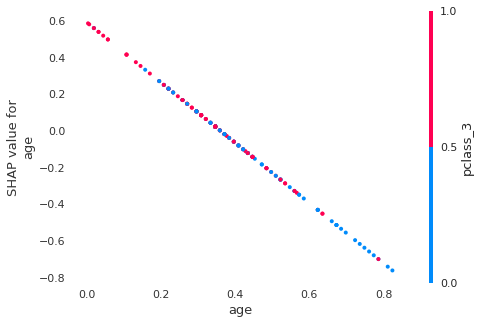

In [82]:
lr.dependence_plot('age')

In [99]:
lr.force_plot()

In [84]:
lr.interpret_model()

100%|██████████| 111/111 [00:00<00:00, 617.89it/s]


<!-- http://127.0.0.1:7664/139990620277328/ -->
 Open in new window

View the highest weighted features in your model.

In [85]:
lr.model_weights()

age : -1.64
sex_male : -1.23
sex_female : 1.23
pclass_3 : -1.06
pclass_1 : 1.05
is_child : 0.56
fare : 0.46
embarked_S : -0.33
embarked_C : 0.20
embarked_Q : 0.13
pclass_2 : 0.00


Easily plot an RoC curve.

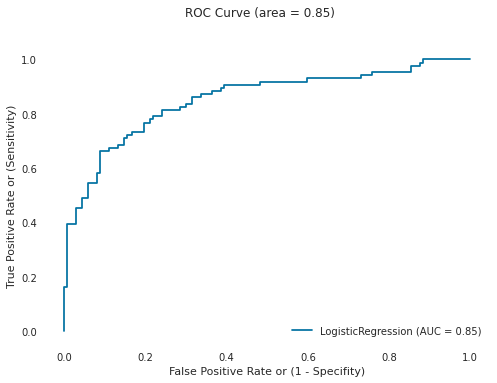

In [86]:
lr.roc_curve()

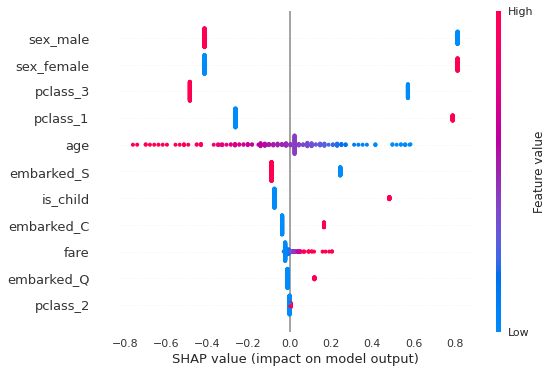

In [87]:
lr.summary_plot()

Finally we can generate the files to deploy our model through a RESTful API using FastAPI, Gunicorn and Docker!

In [102]:
lr.to_service('aethos2')

Deployment files can be found at /home/sidhu/.aethos/projects/aethos2.

To run:
	docker build -t `image_name` ./
	docker run -d --name `container_name` -p `port_num`:80 `image_name`


### User Initialization

If we manually trained a model like we did earlier in the notebook and wanted to use Aethos's model analysis capabilties we can!

In [88]:
lr = at.ClassificationModelAnalysis(
    clf,
    df.x_train,
    df.x_test,
    target='survived',
    model_name='log_reg'
)

> Note: x_train and x_test datasets must have the target variable as part of the DataFrame.

You will receive the same results as above, thus giving you the ability to manually transform your data, train your model and use Aethos to interpret the results. I've included them below for verification.

In [89]:
lr.metrics()

log_reg  \
Accuracy   0.780     
ROC AUC    0.853     
Precision  0.703     

                                                                                                                                                                                             Description  
Accuracy   Measures how many observations, both positive and negative, were correctly classified.                                                                                                         
ROC AUC    Shows how good at ranking predictions your model is. It tells you what is the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.  
Precision  It measures how many observations predicted as positive are positive. Good to use when False Positives are costly.

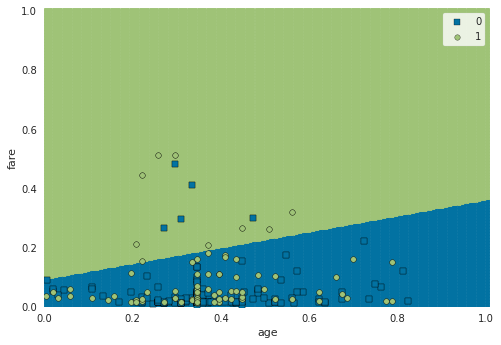

In [90]:
lr.decision_boundary('age', 'fare')

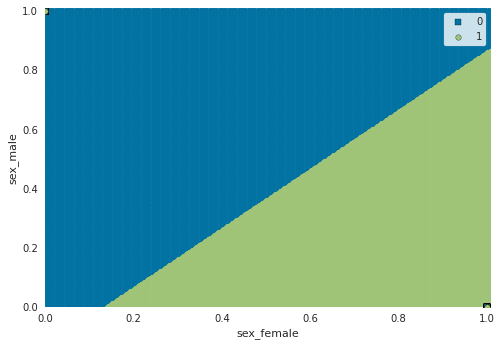

In [91]:
lr.decision_boundary()

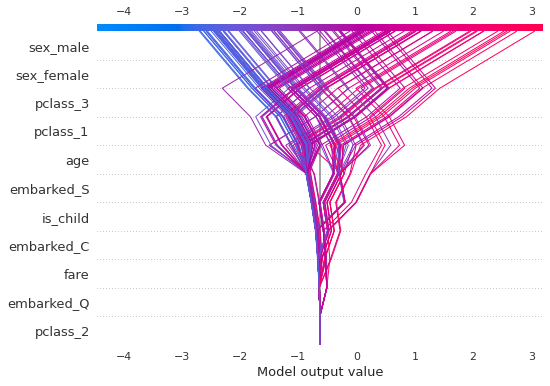

In [92]:
lr.decision_plot()

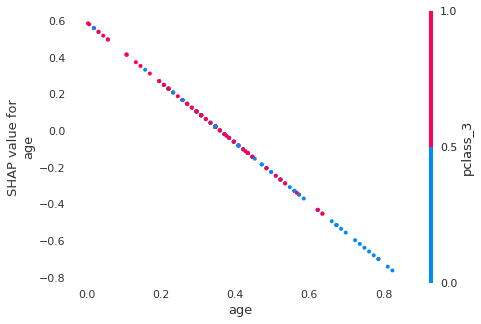

In [93]:
lr.dependence_plot('age')

In [94]:
lr.force_plot()

In [95]:
lr.interpret_model()

100%|██████████| 111/111 [00:00<00:00, 727.94it/s]


<!-- http://127.0.0.1:7664/139990657407168/ -->
 Open in new window

In [96]:
lr.model_weights()

age : -1.64
sex_male : -1.23
sex_female : 1.23
pclass_3 : -1.06
pclass_1 : 1.05
is_child : 0.56
fare : 0.46
embarked_S : -0.33
embarked_C : 0.20
embarked_Q : 0.13
pclass_2 : 0.00


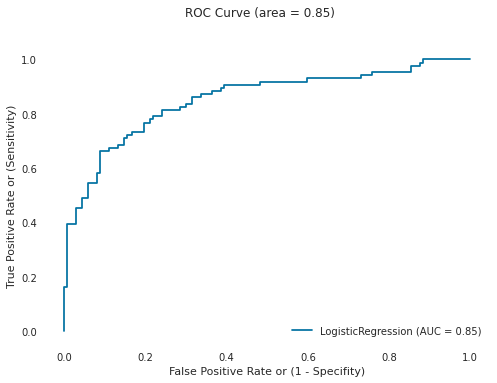

In [97]:
lr.roc_curve()

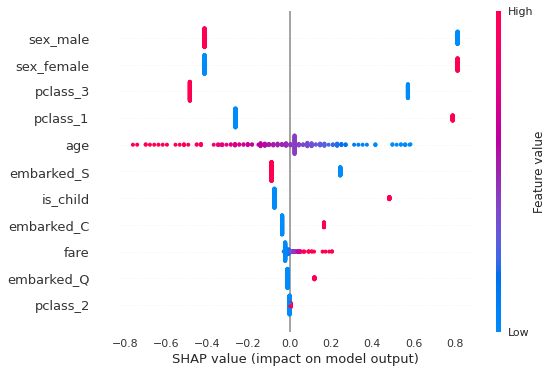

In [98]:
lr.summary_plot()b

In [101]:
lr.to_service('aethos2')

Deployment files can be found at /home/sidhu/.aethos/projects/aethos2.

To run:
	docker build -t `image_name` ./
	docker run -d --name `container_name` -p `port_num`:80 `image_name`


## Feedback

I encourage all feedback about this post or Aethos. You can message me on twitter or e-mail me at sidhuashton@gmail.com.

Any bug or feature requests, please create an issue on the Github repo. I welcome all feature requests and any contributions. This project is a great starter if you’re looking to contribute to an open source project — you can always message me if you need assistance getting started.